In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 #loads an image from the specified file
import os # functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.
import PIL #Python Imaging Library is a free and open-source for opening, manipulating, and saving many different image file formats
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos',origin = dataset_url , cache_dir='/home/fakron/Programming/Python/Data Science/Deep Learning',untar = True)

228818944/228813984 [==============================] - 41s 0us/step


In [4]:
data_dir

'/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos'

In [6]:
import pathlib #The path is used to identify a file.

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos')

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [11]:
roses = list(data_dir.glob('roses/*')) #gives all the image address of rose
roses

[PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/roses/4093390305_4010c736c9.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/roses/18376177250_86060cbdc9.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/roses/1540738662_7b4152e344_m.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/roses/4998708839_c53ee536a8_n.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/roses/15750320284_22ef21c682.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_pho

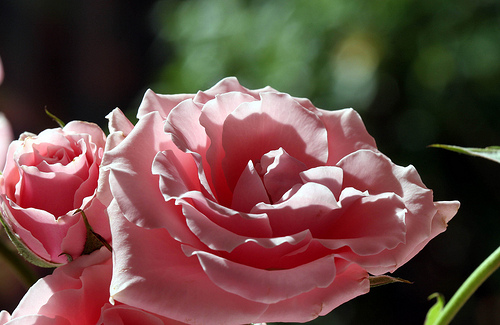

In [12]:
PIL.Image.open(str(roses[1]))

In [13]:
tulips = list(data_dir.glob('tulips/*')) #gives all the image address of rose
tulips

[PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/tulips/16680930777_7e7f292fc5_n.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/tulips/130685347_afbffe3afa_n.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/tulips/8712244311_da8e90bf8e_n.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/tulips/17199499591_67b64b21ed_m.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/tulips/9048307967_40a164a459_m.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/tulips/16930121391_a4092ecf00_n.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/tulips/13997641965_80d5dab542_n.jpg'),
 PosixPath('/home/fakron/Programming/Python/Data Science/Deep Learning/da

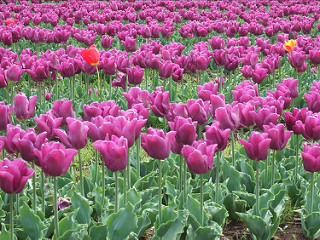

In [14]:
PIL.Image.open(str(tulips[1]))

In [16]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'daisy' : list(data_dir.glob('daisy/*'))
}

In [17]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [22]:
str(flower_images_dict['roses'][0])

'/home/fakron/Programming/Python/Data Science/Deep Learning/datasets/flower_photos/roses/4765063233_f64440c20b.jpg'

In [27]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(332, 500, 3)

In [28]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [32]:
X,y = [],[]

for flower_name,images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        

In [33]:
y[:7]

[0, 0, 0, 0, 0, 0, 0]

In [35]:
X[0]

array([[[146,  79,  10],
        [146,  81,   9],
        [146,  80,  10],
        ...,
        [  7,  66,  17],
        [  5, 100,  25],
        [ 16, 120,  35]],

       [[148,  81,   6],
        [148,  80,   7],
        [149,  80,  11],
        ...,
        [  5,  47,  11],
        [  3,  80,  17],
        [ 12, 109,  32]],

       [[147,  79,   6],
        [149,  81,   8],
        [149,  81,   8],
        ...,
        [  9,  35,   9],
        [  4,  62,  13],
        [  7,  96,  23]],

       ...,

       [[184, 128,  47],
        [186, 130,  49],
        [185, 129,  46],
        ...,
        [107, 152, 113],
        [ 75, 133,  79],
        [ 58, 119,  47]],

       [[184, 128,  47],
        [186, 130,  49],
        [186, 130,  47],
        ...,
        [ 93, 149,  85],
        [ 79, 132,  79],
        [101, 152, 101]],

       [[184, 128,  46],
        [186, 129,  48],
        [186, 131,  46],
        ...,
        [ 88, 145,  90],
        [107, 166, 118],
        [ 82, 135,  78]]

In [36]:
X = np.array(X)
y = np.array(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 15)


In [38]:
len(X_train)

2936

In [39]:
len(y_train)

2936

In [40]:
len(X_test)

734

In [42]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [43]:
X_train_scaled

array([[[[0.59215686, 0.38039216, 0.24313725],
         [0.58823529, 0.37647059, 0.23921569],
         [0.58823529, 0.37647059, 0.23921569],
         ...,
         [0.61960784, 0.41176471, 0.2745098 ],
         [0.60392157, 0.39215686, 0.25490196],
         [0.62352941, 0.41176471, 0.28235294]],

        [[0.58823529, 0.37647059, 0.23921569],
         [0.58823529, 0.37647059, 0.23921569],
         [0.58823529, 0.37647059, 0.23921569],
         ...,
         [0.61176471, 0.41176471, 0.27843137],
         [0.61176471, 0.41176471, 0.28235294],
         [0.61176471, 0.41176471, 0.28627451]],

        [[0.58823529, 0.37647059, 0.23921569],
         [0.58431373, 0.37254902, 0.23529412],
         [0.58823529, 0.37647059, 0.23921569],
         ...,
         [0.62745098, 0.43921569, 0.30980392],
         [0.63137255, 0.45098039, 0.32156863],
         [0.61176471, 0.43137255, 0.30196078]],

        ...,

        [[0.23529412, 0.39215686, 0.29019608],
         [0.25098039, 0.44313725, 0.32941176]

In [49]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(num_classes)
])

model.compile(optimizer = 'adam',
             loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics =['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)


Epoch 1/5
92/92 [==============================] - 45s 395ms/step - loss: 1.2966 - accuracy: 0.4503
Epoch 2/5
92/92 [==============================] - 37s 400ms/step - loss: 0.9535 - accuracy: 0.6322
Epoch 3/5
92/92 [==============================] - 35s 380ms/step - loss: 0.7719 - accuracy: 0.7095
Epoch 4/5
92/92 [==============================] - 38s 419ms/step - loss: 0.5630 - accuracy: 0.7953
Epoch 5/5
92/92 [==============================] - 41s 450ms/step - loss: 0.3399 - accuracy: 0.8876


In [50]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 3s 110ms/step - loss: 1.1135 - accuracy: 0.6662


[1.1134811639785767, 0.6662125587463379]

In [51]:
prediction = model.predict(X_test_scaled)
prediction

array([[ 0.69509244,  1.7306185 ,  0.9403378 , -1.6968164 , -0.37212175],
       [ 0.2760582 , -1.2713218 ,  5.464855  ,  6.4093738 ,  0.45518583],
       [-0.5727669 , 10.852443  ,  2.794385  , -4.556671  , -0.6826487 ],
       ...,
       [-1.670988  ,  4.970974  ,  0.88282764,  3.373842  ,  2.3512664 ],
       [-1.1153526 , -0.74308455,  5.112887  ,  6.1786036 ,  1.8735031 ],
       [ 1.2525984 ,  3.218241  ,  8.792024  , -7.019984  , -2.0205715 ]],
      dtype=float32)

In [53]:
score = tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.1808337 , 0.5093339 , 0.23109366, 0.01653813, 0.06220053],
      dtype=float32)>

In [54]:
np.argmax(score)

1

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

In [ ]:
model.evaluate(X_test_scaled,y_test)